In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer



C:\Users\nepal\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv('NewDataset.csv')
# Split the data into features (X) and target (y)
X = df.drop(columns=['Price'])
y = df['Price']


Label_encoder = LabelEncoder()
nominal_cols = ['Face','Address','City']
transformer = ColumnTransformer([('one_hot_encoder',OneHotEncoder(drop='first'),nominal_cols)],remainder='passthrough')
X_encoded = transformer.fit_transform(X)

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [5]:
# Scale the input features
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Define the MLP architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Output layer with linear activation for regression

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
# Train the model
X_train_dense = X_train.toarray()


# Train the model
model.fit(X_train_dense, y_train, batch_size=32, epochs=50, verbose=1)

Epoch 1/50
77/77 [==============================] - 1s 2ms/step - loss: 1301571853877248.0000
Epoch 2/50
77/77 [==============================] - 0s 2ms/step - loss: 1301535078219776.0000
Epoch 3/50
77/77 [==============================] - 0s 2ms/step - loss: 1301362876874752.0000
Epoch 4/50
77/77 [==============================] - 0s 2ms/step - loss: 1300931501096960.0000
Epoch 5/50
77/77 [==============================] - 0s 2ms/step - loss: 1300128744865792.0000
Epoch 6/50
77/77 [==============================] - 0s 2ms/step - loss: 1298855018627072.0000
Epoch 7/50
77/77 [==============================] - 0s 2ms/step - loss: 1297011672350720.0000
Epoch 8/50
77/77 [==============================] - 0s 2ms/step - loss: 1294522873020416.0000
Epoch 9/50
77/77 [==============================] - 0s 2ms/step - loss: 1291300976459776.0000
Epoch 10/50
77/77 [==============================] - 0s 2ms/step - loss: 1287301556600832.0000
Epoch 11/50
77/77 [==============================] - 0s 2ms

In [9]:
# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mae)
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R2",r2)
print(f"Mean Absolute Error: {mae}")

20/20 [==============================] - 0s 848us/step
RMSE: 4134.978272919009
R2 -1.4506866093750572
Mean Absolute Error: 17098045.317512274


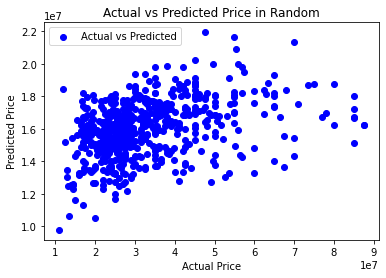

In [10]:
import matplotlib.pyplot as plt

# Assuming 'y_test' is the true target values and 'y_pred' is the predicted target values

# Plotting
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')

# Add labels and title
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price in Random')

# Add legend
plt.legend()

# Display the plot
plt.show()